### Image Scaling

In [17]:
import cv2
import numpy as np

img = cv2.imread('images/cat.png')

#Image 2배 확대
#des1 = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
#OR
height, width = img.shape[:2]
des1 = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

#Image 1/2 축소
des2 = cv2.resize(img,(width // 2, height // 2), interpolation = cv2.INTER_AREA)

#이미지의 중심점을 기준으로 90도 회전 하면서 0.5배 Scale
M = cv2.getRotationMatrix2D (((width-1) /2.0, (height-1) /2.0), 90,1)
des3 = cv2.warpAffine (img, M, (width, height))

cv2.imshow('img', img)
cv2.imshow('2X INTER_CUBIC', des1)
cv2.imshow('1/2', des2)
cv2.imshow('rotation', des3)


cv2.waitKey()
cv2.destroyAllWindows()

### Perspective Transformation

[[ 1.05587376e+00  9.18151097e-02 -6.50969128e+01]
 [ 4.69010049e-02  1.12562412e+00 -7.57920240e+01]
 [ 1.83251448e-04  5.13337001e-04  1.00000000e+00]]


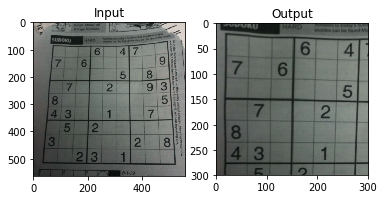

In [21]:
import matplotlib.pyplot as plt

img = cv2.imread('images/sudoku.png')
rows,cols,ch = img.shape

#[x,y] 좌표점을 4x2의 행렬로 작성 (입력 점)
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
# 좌표의 이동점 (출력 점)
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

print(M) #3X3 변환행렬 출력

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()